In [157]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
import numpy as np

In [158]:
df1 = pd.read_csv('fbref.csv')
df2 = pd.read_csv('fotmob.csv')

df = pd.merge(df1, df2, on='Player', how='left')

In [159]:
df.head()

,Unnamed: 0_x,Player,Min,90s,xGChain90,xGBuildup90,PrgC90,PrgP90,Unnamed: 0_y,Tackles90,Interceptions90,PossessionWonFinalThird90,AccuratePasses90
0,0,Jones El-Abdellaoui,184,2.0,0.00,0.00,9.000000,0.000000,313.0,0.5,0.5,0.5,19.8
1,1,Lucien Agoume,962,10.7,0.47,0.36,1.214953,5.794393,84.0,2.1,1.2,0.5,35.7
2,2,Marc Aguado,998,11.1,0.15,0.15,0.270270,3.963964,171.0,1.5,2.0,0.4,48.5
3,3,Pablo Agudín,70,0.8,0.06,0.00,1.250000,1.250000,NaN,NaN,NaN,NaN,NaN
4,4,Ilias Akhomach,188,2.1,1.03,0.20,4.285714,3.333333,8.0,4.0,NaN,NaN,25.9


In [160]:
df = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
df = df.fillna(value='0')

In [161]:
df.head()

,Player,Min,90s,xGChain90,xGBuildup90,PrgC90,PrgP90,Tackles90,Interceptions90,PossessionWonFinalThird90,AccuratePasses90
0,Jones El-Abdellaoui,184,2.0,0.00,0.00,9.0,0.0,0.5,0.5,0.5,19.8
1,Lucien Agoume,962,10.7,0.47,0.36,1.214953,5.794393,2.1,1.2,0.5,35.7
2,Marc Aguado,998,11.1,0.15,0.15,0.27027,3.963964,1.5,2.0,0.4,48.5
3,Pablo Agudín,70,0.8,0.06,0.00,1.25,1.25,0,0,0,0
4,Ilias Akhomach,188,2.1,1.03,0.20,4.285714,3.333333,4.0,0,0,25.9


In [162]:
df.shape

(247, 11)

In [163]:
df = df[df['Min'] >= 200].copy()
df = df.reset_index(drop=True)

In [164]:
df.head()

,Player,Min,90s,xGChain90,xGBuildup90,PrgC90,PrgP90,Tackles90,Interceptions90,PossessionWonFinalThird90,AccuratePasses90
0,Lucien Agoume,962,10.7,0.47,0.36,1.214953,5.794393,2.1,1.2,0.5,35.7
1,Marc Aguado,998,11.1,0.15,0.15,0.27027,3.963964,1.5,2.0,0.4,48.5
2,Carles Aleñá,871,9.7,0.35,0.19,0.618557,3.195876,0,0,0,0
3,Thiago Almada,418,4.6,1.14,0.59,3.043478,6.086957,1.3,0.6,0.9,44.6
4,Domingos André Ribeiro Almeida,565,6.3,0.00,0.00,1.904762,8.888889,0,0,0,0


In [165]:
df.shape

(186, 11)

In [166]:
features = ['xGChain90', 'xGBuildup90', 'PrgC90', 'PrgP90', 
            'Tackles90', 'Interceptions90', 'PossessionWonFinalThird90', 'AccuratePasses90']

df[features] = df[features].astype(float)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

In [167]:
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn.fit(df_scaled)

,n_neighbors,6
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [168]:
pedri_index = df[df['Player'] == 'Pedri'].index[0]

distances, indices = knn.kneighbors(df_scaled[pedri_index].reshape(1, -1))
print("Pedri's Top 5 Twins:")
twins = df.iloc[indices[0]]
print(twins[['Player', 'PossessionWonFinalThird90', 'AccuratePasses90','Interceptions90', 'Tackles90', 'PrgP90', 'PrgC90','xGBuildup90','xGChain90']])

Pedri's Top 5 Twins:
               Player  PossessionWonFinalThird90  AccuratePasses90  \
128             Pedri                        0.8              83.1   
83    Frenkie de Jong                        0.4              76.4   
11         Iago Aspas                        1.0              41.6   
3       Thiago Almada                        0.9              44.6   
92   Giovani Lo Celso                        1.2              50.1   
31      Dani Ceballos                        0.3              71.1   

     Interceptions90  Tackles90     PrgP90    PrgC90  xGBuildup90  xGChain90  
128              0.8        2.0  11.229508  4.344262         0.85       1.09  
83               1.4        2.8   8.645833  3.020833         0.80       0.93  
11               0.9        1.0  10.000000  2.428571         0.59       1.00  
3                0.6        1.3   6.086957  3.043478         0.59       1.14  
92               0.4        1.3   7.894737  1.473684         0.56       0.87  
31            

In [169]:
categories = [
    'PossessionWonFinalThird90', 'AccuratePasses90', 'Interceptions90',
    'Tackles90', 'PrgP90', 'PrgC90', 'xGBuildup90', 'xGChain90'
]


twins = twins.reset_index(drop=True)

In [170]:
twins

,Player,Min,90s,xGChain90,xGBuildup90,PrgC90,PrgP90,Tackles90,Interceptions90,PossessionWonFinalThird90,AccuratePasses90
0,Pedri,1097,12.2,1.09,0.85,4.344262,11.229508,2.0,0.8,0.8,83.1
1,Frenkie de Jong,865,9.6,0.93,0.80,3.020833,8.645833,2.8,1.4,0.4,76.4
2,Iago Aspas,632,7.0,1.00,0.59,2.428571,10.000000,1.0,0.9,1.0,41.6
3,Thiago Almada,418,4.6,1.14,0.59,3.043478,6.086957,1.3,0.6,0.9,44.6
4,Giovani Lo Celso,856,9.5,0.87,0.56,1.473684,7.894737,1.3,0.4,1.2,50.1
5,Dani Ceballos,357,4.0,1.00,0.92,1.500000,10.000000,4.3,1.5,0.3,71.1


In [171]:
twins = twins.drop(columns=['Min', '90s'])

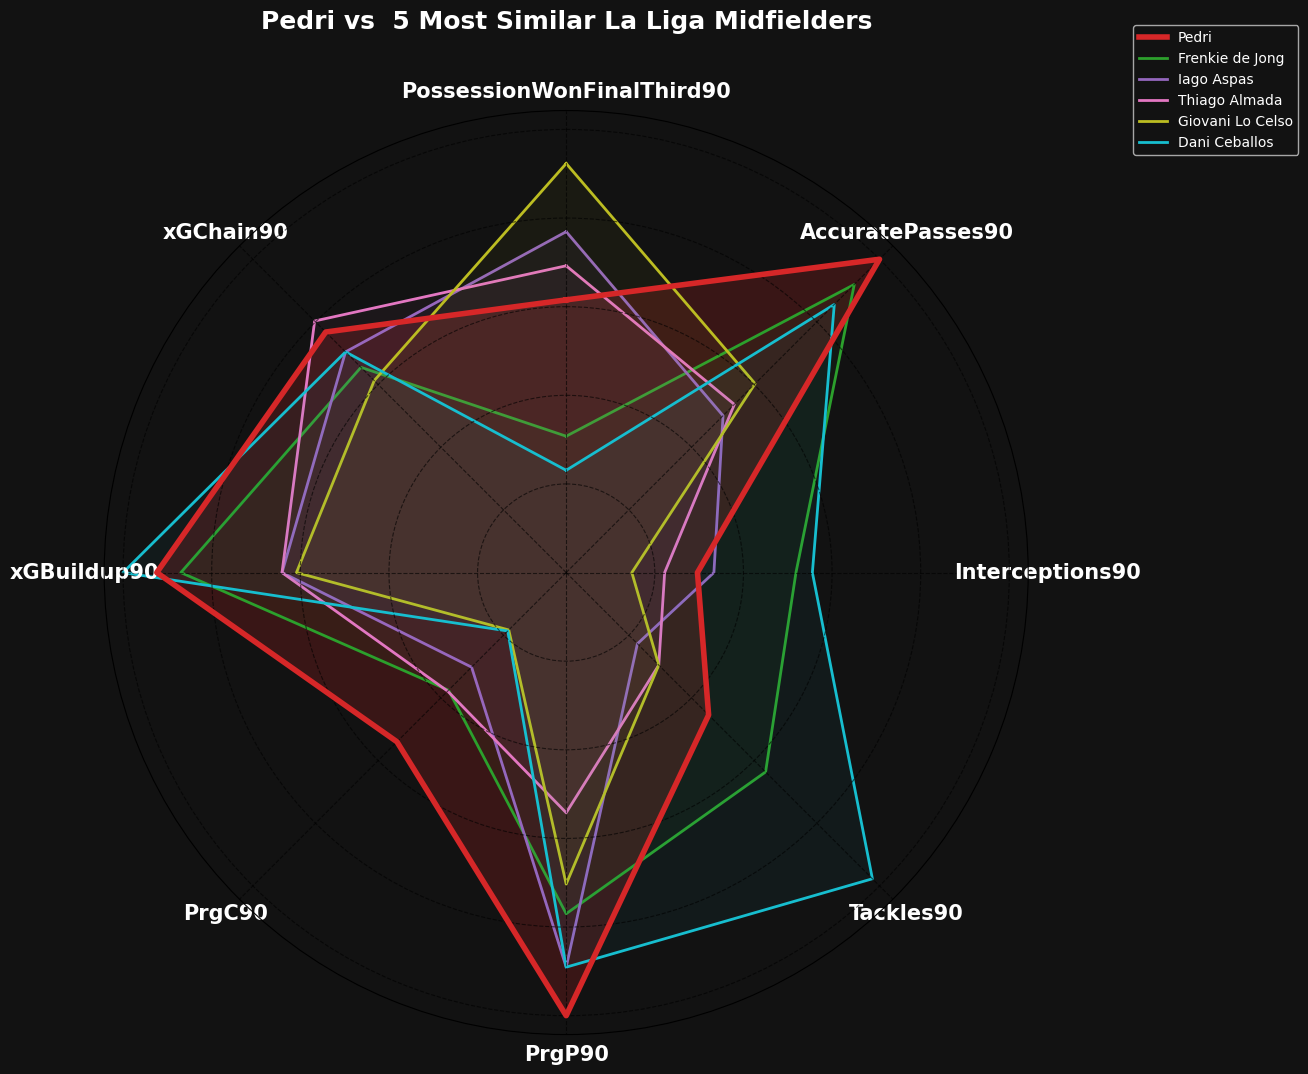

In [174]:
params = [
    'PossessionWonFinalThird90', 'AccuratePasses90', 'Interceptions90', 
    'Tackles90', 'PrgP90', 'PrgC90', 'xGBuildup90', 'xGChain90'
]


players_to_compare = [
    'Pedri', 'Frenkie de Jong', 'Iago Aspas', 
    'Thiago Almada', 'Giovani Lo Celso', 'Dani Ceballos'
]


df_norm = df.copy()
for col in params:
    max_val = df[col].max()
    df_norm[col] = (df[col] / max_val) * 100


num_vars = len(params)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

bg_color = '#121212'      
text_color = "#FFFFFF"    
grid_color = "#000000"

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.spines['polar'].set_color(grid_color) 
ax.grid(color=grid_color, linestyle='--', alpha=0.6) 
ax.tick_params(axis='x', colors=text_color) 


for i, player_name in enumerate(players_to_compare):
   
    player_data = df_norm.loc[df_norm['Player'] == player_name, params].values.flatten().tolist()
    
    if not player_data:
        continue 
        
    player_data += player_data[:1] 
    
    
    if player_name == 'Pedri':
        linewidth = 4
        alpha = 0.2
        zorder = 10
        color = '#d62728'
    else:
        linewidth = 2
        alpha = 0.05
        zorder = 1
        color = colors(i)

    ax.plot(angles, player_data, linewidth=linewidth, color=color, label=player_name, zorder=zorder)
    ax.fill(angles, player_data, color=color, alpha=alpha)


ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(params, size=15, weight='bold')
ax.set_yticklabels([]) 


plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), facecolor=bg_color, labelcolor='white')  
plt.title("Pedri vs  5 Most Similar La Liga Midfielders", size=18, weight='bold', y=1.08, color=text_color)

plt.show()